In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

/var/folders/lz/nlzcstbj3ns0khpcn06c2xgh0000gn/T/ipykernel_46892/1533772275.py:4: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/train.csv')


## 전처리
- 전처리 코드
- x,y 분리

In [2]:
df3 = train.copy()
df3 = df3.drop(columns=['id', 'mold_name', 'name', 'line',
                        'emergency_stop', 'count', 'tryshot_signal',
                        'upper_mold_temp3', 'lower_mold_temp3',
                        'molten_volume', 'time', 'date', 'heating_furnace'])
df3 = df3[~df3['working'].isna()]
df3['registration_time'] = pd.to_datetime(df3['registration_time'])
df3['EMS_operation_time'] = df3['EMS_operation_time'].astype('object')
df3['mold_code'] = df3['mold_code'].astype('object')
df3['molten_temp'] = df3['molten_temp'].fillna(df3['molten_temp'].median())


df3 = df3[~((df3['molten_temp'] == 0)|(df3['low_section_speed'] >= 60000)| (df3['production_cycletime'] == 0) |(df3['upper_mold_temp1'] >= 1449) |(df3['sleeve_temperature'] >= 1449)|(df3['physical_strength'] >= 60000) 
            | (df3['Coolant_temperature'] >= 1449) |(df3['upper_mold_temp2'] >= 4000))]

In [3]:
df3

,working,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,lower_mold_temp1,lower_mold_temp2,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,mold_code
0,가동,731.0,119,120,110.0,112.0,331.0,35.0,198.0,116.0,234.0,316.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,8722
1,가동,720.0,98,125,109.0,109.0,309.0,48.0,250.0,113.0,208.0,163.0,481.0,0.0,30.0,25,2019-01-02 16:45:08,0.0,8412
2,가동,721.0,98,122,109.0,109.0,309.0,48.0,250.0,113.0,208.0,163.0,481.0,0.0,30.0,25,2019-01-02 16:45:58,0.0,8412
3,가동,721.0,100,125,112.0,109.0,308.0,49.0,268.0,122.0,211.0,179.0,483.0,0.0,30.0,25,2019-01-02 16:48:03,0.0,8412
4,가동,721.0,99,123,109.0,110.0,309.0,49.0,276.0,128.0,216.0,187.0,486.0,0.0,30.0,25,2019-01-02 16:50:08,0.0,8412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73607,가동,729.0,122,123,110.0,112.0,329.0,55.0,102.0,183.0,190.0,303.0,363.0,695.0,31.0,23,2019-03-12 06:08:44,0.0,8917
73608,가동,719.0,124,125,104.0,106.0,325.0,46.0,115.0,172.0,195.0,194.0,311.0,648.0,33.0,23,2019-03-12 06:09:04,0.0,8722
73609,가동,734.0,129,123,110.0,111.0,318.0,51.0,207.0,160.0,128.0,203.0,405.0,726.0,34.0,6,2019-03-12 06:10:12,0.0,8412
73610,가동,730.0,122,124,110.0,112.0,329.0,49.0,102.0,183.0,190.0,302.0,370.0,697.0,31.0,23,2019-03-12 06:10:48,0.0,8917


## 추가 전처리
1. 문자형 변수 처리 (Label Encoding 또는 One-Hot Encoding)
2. 결측치 처리
3. train_y도 인코딩 되어있는지 확인

In [4]:
from sklearn.preprocessing import LabelEncoder

# 1. 타겟 라벨 인코딩
df3['working'] = df3['working'].map({'가동': 1, '비가동': 0})

# 2. 불필요한 시간 변수 제거
df3 = df3.drop(columns=['registration_time'])

# 3. 범주형 변수 라벨 인코딩 (Streamlit 적용 위해 고정된 수치가 좋음)
categorical_cols = ['EMS_operation_time', 'mold_code']
for col in categorical_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col].astype(str))

# 4. 결측치 확인 및 처리 (필요 시)
df3 = df3.fillna(df3.median(numeric_only=True))  # 수치형 결측치만 채움

In [5]:
train_X = df3.drop(columns=['passorfail'])
train_y = df3['passorfail']

## 모델 학습

In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(train_X, train_y)

DecisionTreeClassifier(random_state=42)

## 예측

In [7]:
test

,id,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,...,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,tryshot_signal,mold_code,heating_furnace
0,73612,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-12,06:12:13,274,가동,ON,733.0,...,202.0,1449.0,402.0,735.0,34.0,6,2019-03-12 06:12:13,NaN,8412,B
1,73613,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-12,06:12:47,293,가동,ON,730.0,...,302.0,1449.0,368.0,693.0,31.0,23,2019-03-12 06:12:47,NaN,8917,NaN
2,73614,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-12,06:13:08,284,가동,ON,717.0,...,193.0,1008.0,312.0,656.0,33.0,23,2019-03-12 06:13:08,NaN,8722,NaN
3,73615,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-12,06:14:19,275,가동,ON,733.0,...,206.0,1449.0,413.0,731.0,33.0,6,2019-03-12 06:14:19,NaN,8412,B
4,73616,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-12,06:14:49,294,가동,ON,730.0,...,302.0,1449.0,367.0,695.0,31.0,23,2019-03-12 06:14:49,NaN,8917,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18398,92010,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,23:51:29,71,가동,ON,731.0,...,201.0,1449.0,279.0,726.0,30.0,0,2019-03-31 23:51:29,NaN,8917,A
18399,92011,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,23:53:28,72,가동,ON,731.0,...,201.0,1449.0,279.0,732.0,30.0,0,2019-03-31 23:53:28,NaN,8917,A
18400,92012,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,23:55:44,73,가동,ON,732.0,...,195.0,1449.0,272.0,731.0,30.0,0,2019-03-31 23:55:44,NaN,8917,A
18401,92013,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,23:57:46,74,가동,ON,732.0,...,199.0,1449.0,288.0,723.0,30.0,0,2019-03-31 23:57:46,NaN,8917,A


In [8]:
df = test.copy()
df = df.drop(columns=['id', 'mold_name', 'name', 'line','emergency_stop', 'count', 'tryshot_signal',
                        'upper_mold_temp3', 'lower_mold_temp3',
                        'molten_volume', 'time', 'date', 'heating_furnace'])
df = df[~df['working'].isna()]
df['registration_time'] = pd.to_datetime(df['registration_time'])
df['EMS_operation_time'] = df['EMS_operation_time'].astype('object')
df['mold_code'] = df['mold_code'].astype('object')
df['molten_temp'] = df['molten_temp'].fillna(df['molten_temp'].median())


df = df[~((df['molten_temp'] == 0)|(df['low_section_speed'] >= 60000)| (df['production_cycletime'] == 0) |(df3['upper_mold_temp1'] >= 1449) |(df3['sleeve_temperature'] >= 1449)|(df3['physical_strength'] >= 60000) 
            | (df['Coolant_temperature'] >= 1449) |(df['upper_mold_temp2'] >= 4000))]

/var/folders/lz/nlzcstbj3ns0khpcn06c2xgh0000gn/T/ipykernel_46892/1110381725.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~((df['molten_temp'] == 0)|(df['low_section_speed'] >= 60000)| (df['production_cycletime'] == 0) |(df3['upper_mold_temp1'] >= 1449) |(df3['sleeve_temperature'] >= 1449)|(df3['physical_strength'] >= 60000)


In [9]:
df

,working,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,lower_mold_temp1,lower_mold_temp2,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,mold_code
0,가동,733.0,121,122,110.0,112.0,317.0,53.0,211.0,160.0,128.0,202.0,402.0,735.0,34.0,6,2019-03-12 06:12:13,8412
1,가동,730.0,124,123,110.0,112.0,329.0,52.0,102.0,183.0,190.0,302.0,368.0,693.0,31.0,23,2019-03-12 06:12:47,8917
2,가동,717.0,121,125,105.0,106.0,325.0,48.0,115.0,171.0,192.0,193.0,312.0,656.0,33.0,23,2019-03-12 06:13:08,8722
3,가동,733.0,119,121,110.0,112.0,330.0,50.0,213.0,161.0,129.0,206.0,413.0,731.0,33.0,6,2019-03-12 06:14:19,8412
4,가동,730.0,122,123,110.0,112.0,329.0,52.0,102.0,183.0,190.0,302.0,367.0,695.0,31.0,23,2019-03-12 06:14:49,8917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18398,가동,731.0,122,122,100.0,101.0,331.0,49.0,83.0,183.0,231.0,201.0,279.0,726.0,30.0,0,2019-03-31 23:51:29,8917
18399,가동,731.0,120,121,100.0,101.0,331.0,54.0,83.0,184.0,232.0,201.0,279.0,732.0,30.0,0,2019-03-31 23:53:28,8917
18400,가동,732.0,122,135,100.0,101.0,331.0,52.0,79.0,184.0,225.0,195.0,272.0,731.0,30.0,0,2019-03-31 23:55:44,8917
18401,가동,732.0,133,122,100.0,101.0,331.0,53.0,82.0,185.0,227.0,199.0,288.0,723.0,30.0,0,2019-03-31 23:57:46,8917


In [10]:
from sklearn.preprocessing import LabelEncoder

# 1. 타겟 라벨 인코딩
df['working'] = df['working'].map({'가동': 1, '비가동': 0})

# 2. 불필요한 시간 변수 제거
df = df.drop(columns=['registration_time'])

# 3. 범주형 변수 라벨 인코딩 (Streamlit 적용 위해 고정된 수치가 좋음)
categorical_cols = ['EMS_operation_time', 'mold_code']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# 4. 결측치 확인 및 처리 (필요 시)
df = df.fillna(df.median(numeric_only=True))  # 수치형 결측치만 채움

In [11]:
test_X = df.copy()
predictions = model.predict(test_X)

In [13]:
predictions # 1은 합격, 0은 불합격

array([0., 0., 0., ..., 0., 0., 1.])

In [38]:
sample = test_X.iloc[-1].values.reshape(1, -1)  # (1, n_features)로 reshape

prediction = model.predict(sample)
print("예측 결과:", prediction[0])  # 0 또는 1

예측 결과: 1.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [15]:
import numpy as np

# 예측 결과가 predictions라는 배열에 저장되어 있다고 가정
unique, counts = np.unique(predictions, return_counts=True)

# 결과 출력
for label, count in zip(unique, counts):
    print(f"{label} → {count}개")

0.0 → 16891개
1.0 → 1500개


In [ ]:
import joblib
import os
os.makedirs("model", exist_ok=True)
joblib.dump(model, "../models/test_model.pkl")

['../models/test_model.pkl']

test 모델

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/var/folders/lz/nlzcstbj3ns0khpcn06c2xgh0000gn/T/ipykernel_46892/4147771976.py:14: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/train.csv')


[CV] END classifier__criterion=gini, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.5s
[CV] END classifier__criterion=gini, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.5s
[CV] END classifier__criterion=gini, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=5; total time=   0.5s
[CV] END classifier__criterion=gini, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=5; total time=   0.5s
[CV] END classifier__criterion=gini, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.5s
[CV] END classifier__criterion=gini, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2; total time=   0.3s
[CV] END classifier__criterion=gini, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=

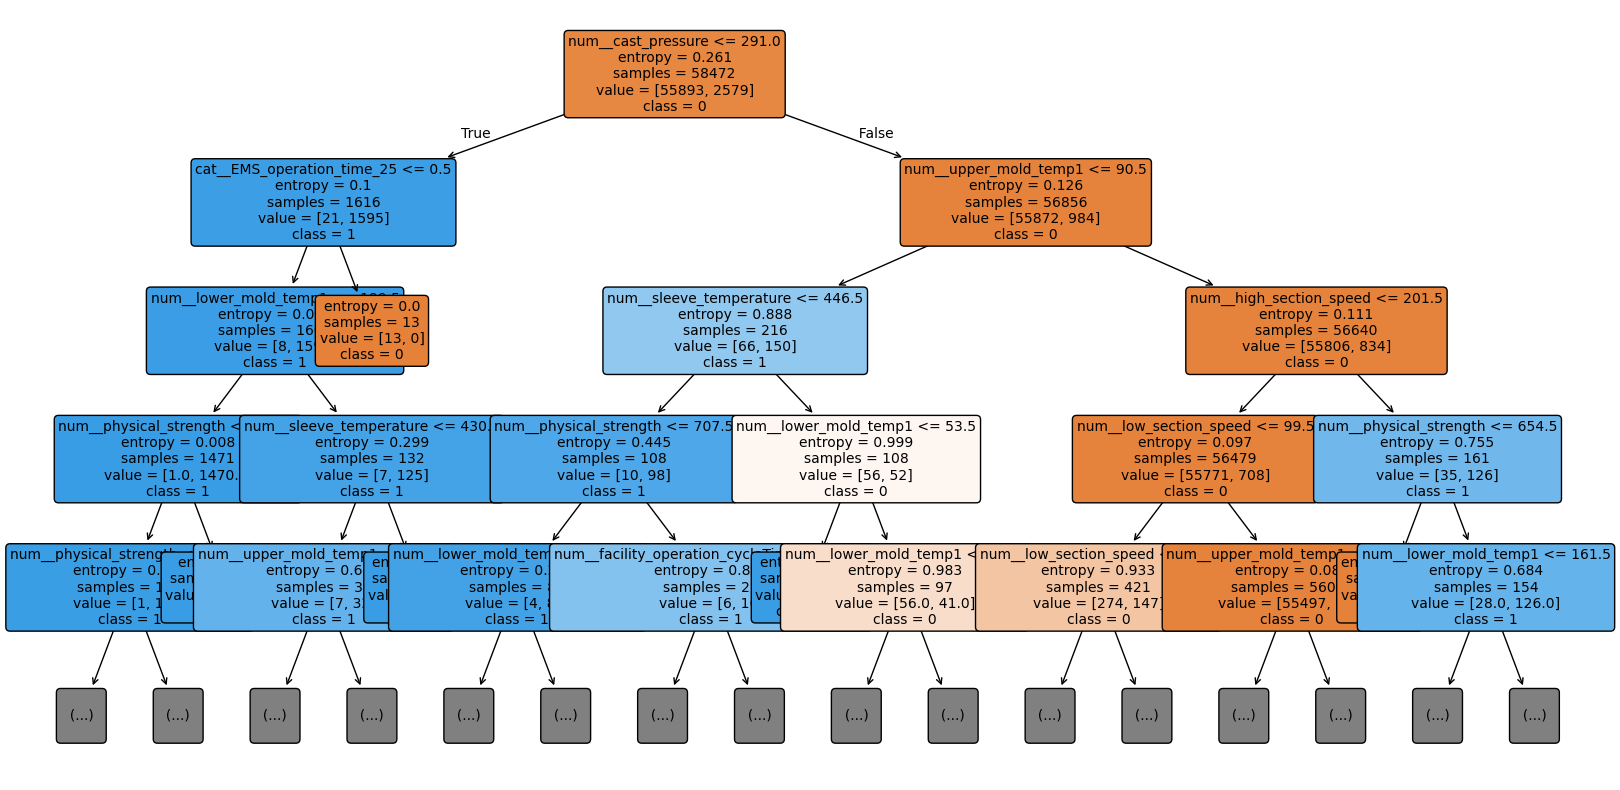

              precision    recall  f1-score   support

          양품       0.99      1.00      0.99     13973
          불량       0.89      0.84      0.87       645

    accuracy                           0.99     14618
   macro avg       0.94      0.92      0.93     14618
weighted avg       0.99      0.99      0.99     14618

                              Feature  Importance
5                  num__cast_pressure    0.555328
7               num__upper_mold_temp1    0.085228
3              num__low_section_speed    0.056287
11            num__sleeve_temperature    0.055933
4             num__high_section_speed    0.049674
10              num__lower_mold_temp2    0.045060
8               num__upper_mold_temp2    0.038651
1   num__facility_operation_cycleTime    0.033427
9               num__lower_mold_temp1    0.019826
6              num__biscuit_thickness    0.014279
12             num__physical_strength    0.011985
2           num__production_cycletime    0.009498
0                    nu

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# 데이터 로드 및 전처리
df = pd.read_csv('../data/train.csv')
df3 = df.copy()
df3 = df3.drop(columns=['id', 'mold_name', 'name', 'line',
                        'emergency_stop', 'count', 'tryshot_signal',
                        'upper_mold_temp3', 'lower_mold_temp3',
                        'molten_volume', 'time', 'date', 'heating_furnace'])
df3 = df3[~df3['working'].isna()]
df3['registration_time'] = pd.to_datetime(df3['registration_time'])
df3['EMS_operation_time'] = df3['EMS_operation_time'].astype('object')
df3['mold_code'] = df3['mold_code'].astype('object')


df3 = df3[~((df3['molten_temp'] == 0)|(df3['low_section_speed'] >= 60000)| (df3['production_cycletime'] == 0) |
            (df3['upper_mold_temp1'] >= 1449) |(df3['sleeve_temperature'] >= 1449)|(df3['physical_strength'] >= 60000) 
            | (df3['Coolant_temperature'] >= 1449) |(df3['upper_mold_temp2'] >= 4000))]

df3['molten_temp'] = df3['molten_temp'].fillna(df3['molten_temp'].median())


X = df3.drop('passorfail', axis=1)
y = df3['passorfail']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# 최종 파이프라인 (트리 포함)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 그리드서치 파라미터 정의
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 5, 10, 20],
    'classifier__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# 그리드서치 학습
grid_search.fit(X_train, y_train)

# 최적 파라미터 및 성능 출력
print("Best parameters:", grid_search.best_params_)

# 최적 모델 성능 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
recall = recall_score(y_val, y_pred, pos_label=1)
f1 = f1_score(y_val, y_pred, pos_label=1)

print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1: {f1:.4f}')


from sklearn.tree import plot_tree
best_model = grid_search.best_estimator_

# 트리 모델 추출
dt_model = best_model.named_steps['classifier']

# 특성 이름 추출 (preprocessor가 학습된 상태에서!)
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=['0', '1'],  # 0: 양품, 1: 불량
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=4  # 복잡성 제한
)
plt.show()

from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred, target_names=['양품', '불량']))



best_model.predict_proba(X_val)[:30]


importances = dt_model.feature_importances_

# 중요도 데이터프레임 생성
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 상위 N개 확인
print(feature_importance_df.head(20))


y_proba = best_model.predict_proba(X_val)[:, 1]  # 불량(1) 클래스 확률

In [ ]:
test = pd.read_csv('../data/test.csv')

df3 = test.copy()
df3 = df3.drop(columns=['id', 'mold_name', 'name', 'line', 'emergency_stop', 'count', 'tryshot_signal',
                        'upper_mold_temp3', 'lower_mold_temp3','molten_volume', 'time', 'date', 'heating_furnace'])
df3 = df3[~df3['working'].isna()]
df3['registration_time'] = pd.to_datetime(df3['registration_time'])
df3['EMS_operation_time'] = df3['EMS_operation_time'].astype('object')
df3['mold_code'] = df3['mold_code'].astype('object')


df3 = df3[~((df3['molten_temp'] == 0)|(df3['low_section_speed'] >= 60000)| (df3['production_cycletime'] == 0) |
            (df3['upper_mold_temp1'] >= 1449) |(df3['sleeve_temperature'] >= 1449)|(df3['physical_strength'] >= 60000) 
            | (df3['Coolant_temperature'] >= 1449) |(df3['upper_mold_temp2'] >= 4000))]

df3['molten_temp'] = df3['molten_temp'].fillna(df3['molten_temp'].median())

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

predictions = best_model.predict(df3)

import numpy as np

# 예측 결과가 predictions라는 배열에 저장되어 있다고 가정
unique, counts = np.unique(predictions, return_counts=True)

# 결과 출력
for label, count in zip(unique, counts):
    print(f"{label} → {count}개")

838 / (17553 + 838) * 100

0.0 → 17553개
1.0 → 838개


4.55657658637377

In [45]:
import joblib
import os
os.makedirs("model", exist_ok=True)
joblib.dump(model, "../models/best_model_20250604_1.pkl")

['../models/best_model_20250604_1.pkl']

In [46]:
df.groupby("mold_code").count()

,id,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,...,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,heating_furnace
mold_code,,,,,,,,,,,,,,,,,,,,,
8412,18468,18468,18468,18468,18468,18468,18468,18468,18468,16207,...,18468,18156,18468,18468,18468,18468,18468,18468,389,12058
8573,9596,9596,9596,9596,9596,9596,9596,9596,9596,9596,...,9596,9596,9596,9596,9596,9596,9596,9596,0,9596
8600,2960,2960,2960,2960,2960,2960,2960,2960,2960,2960,...,2960,2960,2960,2960,2960,2960,2960,2960,0,0
8722,19665,19665,19665,19665,19665,19665,19665,19664,19664,19665,...,19664,19664,19664,19664,19664,19665,19665,19665,465,0
8917,22923,22923,22923,22923,22923,22923,22923,22923,22923,22923,...,22923,22923,22923,22923,22923,22923,22923,22923,390,11077


In [1]:
# 찍혀서 나오는 두번째 열이 불량이 나올 확률임
best_model.predict_proba(X_val)[:30]

NameError: name 'best_model' is not defined